# CONFIGURAÇÕES

## Importando os pacotes

In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski
from matplotlib.cbook import boxplot_stats

## Configurando os pacotes

In [2]:
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(13, 6)})
pd.options.display.float_format = "{:.2f}".format

# INGESTÃO DOS DADOS

In [3]:
df_smiles = pd.read_parquet('~/Documents/PubChemQC/pubchem_smiles.parquet')
df_properties = pd.read_parquet('~/Documents/PubChemQC/qm_properties.parquet')
df_energies = pd.read_parquet('~/Documents/PubChemQC/transitions_energies.parquet')

In [4]:
data = df_smiles.merge(df_properties, how='inner', on='cid').merge(df_energies, how='inner', on='cid')

In [5]:
data.head()

,cid,canonical smiles,isomeric smiles,charge,total dipole moment,multiplicity,homo,lumo,gap,total energy,...,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
0,1,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,0,12.36,1,-4.66,-0.30,4.35,-19287.58,...,37641.45,0.01,37976.27,0.00,38311.23,0.00,40062.49,0.00,40525.34,0.00
1,2,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,1,5.86,1,-11.07,-3.55,7.52,-19299.20,...,58598.53,0.01,59362.01,0.01,60451.94,0.00,62136.40,0.03,62379.61,0.02
2,3,C1=CC(C(C(=C1)C(=O)O)O)O,C1=CC(C(C(=C1)C(=O)O)O)O,0,5.27,1,-6.82,-2.24,4.58,-15575.87,...,46837.50,0.00,48214.78,0.01,48851.17,0.00,50890.90,0.05,51729.94,0.01
3,4,CC(CN)O,CC(CN)O,0,2.68,1,-6.19,1.85,8.04,-6794.54,...,58571.21,0.01,60147.53,0.01,60319.62,0.01,60994.09,0.00,62458.03,0.00
4,5,C(C(=O)COP(=O)(O)O)N,C(C(=O)COP(=O)(O)O)N,0,8.45,1,-7.27,-1.53,5.74,-24256.84,...,50735.50,0.00,53071.09,0.01,54805.91,0.03,54979.82,0.00,55740.21,0.01


In [5]:
pd.set_option('display.max_columns', None)
data[data['gap'] > 15]

,cid,canonical smiles,isomeric smiles,charge,total dipole moment,multiplicity,homo,lumo,gap,total energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
188,223,[NH4+],[NH4+],1,0.00,1,-22.49,-5.74,16.75,-1548.16,119916.02,0.14,119925.88,0.14,119935.50,0.14,136290.99,0.00,136299.03,0.00,136306.64,0.00,137620.33,0.00,137625.64,0.00,139271.84,0.11,139276.96,0.11
258,312,[Cl-],[Cl-],-1,0.00,1,0.40,17.51,17.11,-12524.10,45616.33,0.19,45616.34,0.19,45616.34,0.19,52499.99,0.00,52499.99,0.00,52500.00,0.00,52500.01,0.00,52500.01,0.00,52574.04,0.00,52574.06,0.00
699,888,[Mg+2],[Mg+2],2,0.00,1,-70.37,-18.24,52.12,-5421.25,403095.12,0.06,403095.13,0.06,403095.14,0.06,447134.89,0.00,447134.89,0.00,447134.90,0.00,447342.32,0.00,447342.32,0.00,447342.32,0.00,447342.33,0.00
731,923,[Na+],[Na+],1,0.00,1,-39.52,-6.98,32.54,-4410.45,249247.46,0.04,249247.47,0.04,249247.48,0.04,274272.35,0.00,274272.35,0.00,274272.36,0.00,274272.36,0.00,274272.36,0.00,274477.55,0.00,274477.55,0.00
4416,6393,C(F)(F)(F)F,C(F)(F)(F)F,0,0.00,1,-11.66,4.87,16.53,-11904.34,92864.84,0.00,92868.20,0.00,92870.84,0.00,102688.35,0.00,102690.09,0.00,102806.22,0.13,102806.90,0.13,102807.39,0.13,102988.43,0.00,103144.85,0.00
17013,23935,[Ne],[Ne],0,0.00,1,-14.39,38.68,53.07,-3507.39,145697.99,0.11,145698.01,0.11,145698.01,0.11,163465.82,0.00,163465.83,0.00,163465.83,0.00,163977.43,0.00,163977.43,0.00,163977.44,0.00,163977.44,0.00
17015,23968,[Ar],[Ar],0,0.00,1,-11.48,11.30,22.77,-14354.47,91855.68,0.15,91855.69,0.15,91855.69,0.15,104887.11,0.00,104887.11,0.00,104887.13,0.00,104887.14,0.00,104887.14,0.00,105127.07,0.00,105127.08,0.00
17018,23987,[He],[He],0,0.00,1,-17.68,30.47,48.15,-79.10,419631.78,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17780,26255,[B-](F)(F)(F)F,[B-](F)(F)(F)F,-1,0.00,1,-3.13,12.48,15.61,-11551.21,64261.25,0.00,64262.10,0.00,64263.51,0.00,68666.98,0.00,68668.18,0.00,69055.60,0.00,69076.26,0.00,69076.71,0.00,69077.27,0.00,69203.02,0.03
18286,28179,[F-],[F-],-1,0.00,1,4.57,36.42,31.85,-2714.45,74202.35,0.16,74202.36,0.16,74202.36,0.16,86517.66,0.00,86517.67,0.00,86517.67,0.00,87453.08,0.00,87453.08,0.00,87453.08,0.00,87453.08,0.00


# TRANSFORMAÇÃO DOS DADOS

In [6]:
# criando função de conversão da unidade de energia de cm-1 para eV
def cm_to_eV(cm_Energy):
    eV_Energy = cm_Energy/8066
    return eV_Energy

In [7]:
# aplicando a função criada à coluna total energy de df_properties
data['total energy'] = [cm_to_eV(row) for row in data['total energy']]

In [8]:
# aplicando a função criada às colunas de energia de df_energies
for column in data.columns:
    if 'TD_ET' in column:
        data[column] = [cm_to_eV(row) for row in data[column]]
    else:
        pass

# EXPLORANDO OS DADOS

In [10]:
data.shape

(3332473, 30)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3332473 entries, 0 to 3332472
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   cid                  int64  
 1   canonical smiles     object 
 2   isomeric smiles      object 
 3   charge               int64  
 4   total dipole moment  float64
 5   multiplicity         int64  
 6   homo                 float64
 7   lumo                 float64
 8   gap                  float64
 9   total energy         float64
 10  TD_ET_00             float64
 11  TD_OS_00             float64
 12  TD_ET_01             float64
 13  TD_OS_01             float64
 14  TD_ET_02             float64
 15  TD_OS_02             float64
 16  TD_ET_03             float64
 17  TD_OS_03             float64
 18  TD_ET_04             float64
 19  TD_OS_04             float64
 20  TD_ET_05             float64
 21  TD_OS_05             float64
 22  TD_ET_06             float64
 23  TD_OS_06             float64
 24

In [12]:
data.describe()

,cid,charge,total dipole moment,multiplicity,homo,lumo,gap,total energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
count,3332473.00,3332473.00,3332473.00,3332473.00,3332473.00,3332473.00,3332473.00,3332473.00,3332473.00,3332471.00,3332469.00,3332467.00,3332469.00,3332467.00,3332465.00,3332463.00,3332461.00,3332460.00,3332453.00,3332453.00,3332450.00,3332450.00,3332450.00,3332450.00,3332449.00,3332449.00,3332433.00,3332433.00
mean,43448208.32,0.01,3.62,1.00,-6.14,-0.47,5.67,-2.58,4.56,0.04,4.94,0.04,5.20,0.03,5.40,0.03,5.57,0.03,5.72,0.03,5.84,0.03,5.95,0.03,6.05,0.03,6.14,0.03
std,24573093.27,0.23,2.29,0.00,1.28,1.56,1.23,1.21,0.89,0.10,0.82,0.09,0.78,0.07,0.75,0.07,0.73,0.07,0.71,0.07,0.70,0.07,0.69,0.07,0.69,0.06,0.68,0.06
min,1.00,-4.00,0.00,1.00,-137.32,-24.29,0.31,-57.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83,0.00,0.84,0.00,0.85,0.00,0.95,0.00
25%,19781142.00,0.00,1.99,1.00,-6.55,-1.24,4.86,-2.79,4.04,0.00,4.45,0.00,4.74,0.00,4.97,0.00,5.15,0.00,5.30,0.00,5.43,0.00,5.54,0.00,5.64,0.00,5.73,0.00
50%,55283812.00,0.00,3.22,1.00,-6.08,-0.43,5.57,-2.35,4.63,0.01,4.96,0.01,5.20,0.01,5.39,0.01,5.55,0.01,5.68,0.01,5.80,0.01,5.90,0.01,6.00,0.01,6.08,0.01
75%,64091667.00,0.00,4.74,1.00,-5.66,0.29,6.41,-2.02,5.15,0.04,5.45,0.03,5.66,0.03,5.82,0.03,5.98,0.03,6.11,0.03,6.22,0.03,6.32,0.03,6.41,0.03,6.50,0.03
max,75277270.00,5.00,46.58,1.00,21.09,38.68,115.85,-0.00,114.72,3.14,117.24,2.12,117.24,2.06,117.24,2.85,128.65,2.51,129.14,2.69,129.14,3.75,129.14,2.70,133.17,3.40,133.17,2.36


In [13]:
pd.reset_option('max_columns')

In [14]:
data.isnull().sum()

cid                     0
canonical smiles        0
isomeric smiles         0
charge                  0
total dipole moment     0
multiplicity            0
homo                    0
lumo                    0
gap                     0
total energy            0
TD_ET_00                0
TD_OS_00                2
TD_ET_01                4
TD_OS_01                6
TD_ET_02                4
TD_OS_02                6
TD_ET_03                8
TD_OS_03               10
TD_ET_04               12
TD_OS_04               13
TD_ET_05               20
TD_OS_05               20
TD_ET_06               23
TD_OS_06               23
TD_ET_07               23
TD_OS_07               23
TD_ET_08               24
TD_OS_08               24
TD_ET_09               40
TD_OS_09               40
dtype: int64

In [15]:
# quantidade de smiles canônicos únicos
data['canonical smiles'].nunique()

3026134

In [16]:
# quantidade de smiles isoméricos únicos
data['isomeric smiles'].nunique()

3332374

In [17]:
# quantidade de smiles canônicos duplicados
len(data[data.duplicated(['canonical smiles'], keep=False)])

520651

In [18]:
# quantidade de smiles isoméricos duplicados
len(data[data.duplicated(['isomeric smiles'], keep=False)])

183

In [19]:
data[data['isomeric smiles'] == 'CC1=CC=C(C=C1)S(=O)(=O)N=[N+]=[N-]']

,cid,canonical smiles,isomeric smiles,charge,total dipole moment,multiplicity,homo,lumo,gap,total energy,...,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
10067,13661,CC1=CC=C(C=C1)S(=O)(=O)N=[N+]=[N-],CC1=CC=C(C=C1)S(=O)(=O)N=[N+]=[N-],0,5.83,1,-7.51,-1.96,5.55,-3.32,...,5.58,0.00,5.71,0.14,5.83,0.00,6.08,0.05,6.10,0.02
305965,5359526,CC1=CC=C(C=C1)S(=O)(=O)N=[N+]=[N-],CC1=CC=C(C=C1)S(=O)(=O)N=[N+]=[N-],0,5.83,1,-7.51,-1.96,5.56,-3.32,...,5.58,0.00,5.71,0.14,5.83,0.00,6.08,0.05,6.10,0.02


In [20]:
# quantidade de cids únicos
data['cid'].nunique()

3332473

In [21]:
# quantidade de cids duplicados
len(data[data.duplicated(['cid'], keep=False)])

0

# VISUALIZANDO OS DADOS

[Text(0.5, 0, 'gap'), Text(0, 0.5, 'quantidade')]

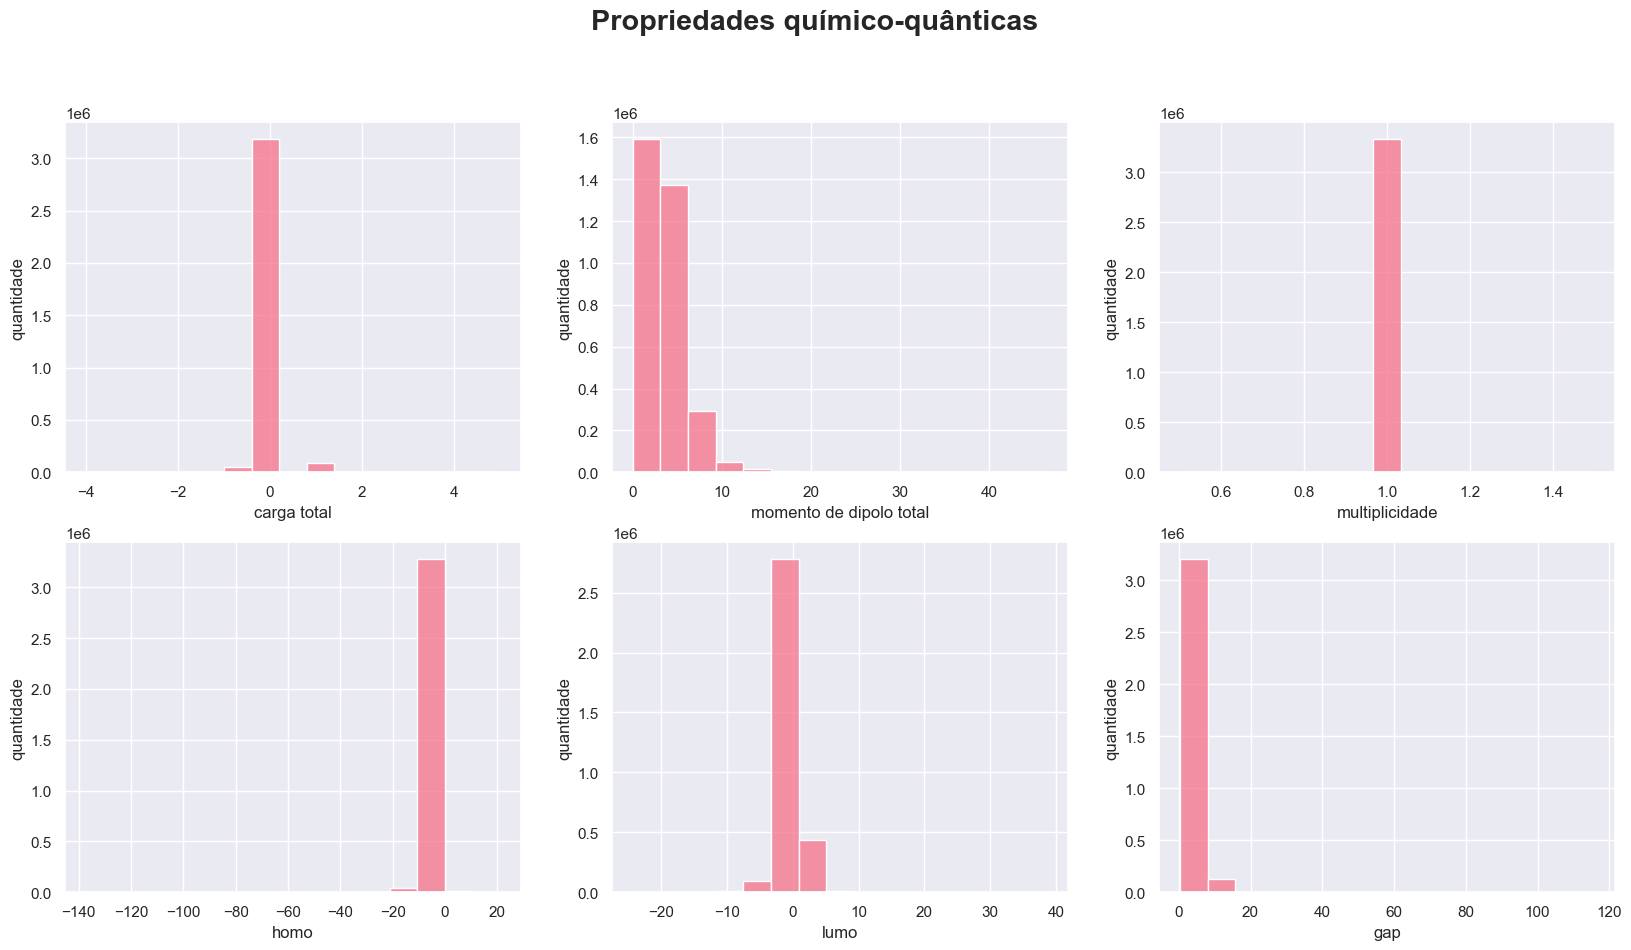

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle(
    'Propriedades químico-quânticas',
    verticalalignment='center',
    fontsize='xx-large',
    weight='bold')

# Plot 1:
ax1 = sns.histplot(data=data, x='charge', ax=ax[0,0], bins=15)
ax1.set(xlabel="carga total", ylabel="quantidade")

# Plot 2:
ax2 = sns.histplot(data=data, x='total dipole moment', ax=ax[0,1], bins=15)
ax2.set(xlabel="momento de dipolo total", ylabel="quantidade")

# Plot 3:
ax3 = sns.histplot(data=data, x='multiplicity', ax=ax[0,2], bins=15)
ax3.set(xlabel="multiplicidade", ylabel="quantidade")

# Plot 4:
ax4 = sns.histplot(data=data, x='homo', ax=ax[1,0], bins=15)
ax4.set(xlabel="homo", ylabel="quantidade")

# Plot 5:
ax5 = sns.histplot(data=data, x='lumo', ax=ax[1,1], bins=15)
ax5.set(xlabel="lumo", ylabel="quantidade")

# Plot 6:
ax6 = sns.histplot(data=data, x='gap', ax=ax[1,2], bins=15)
ax6.set(xlabel="gap", ylabel="quantidade")


## Primeira energia de excitação

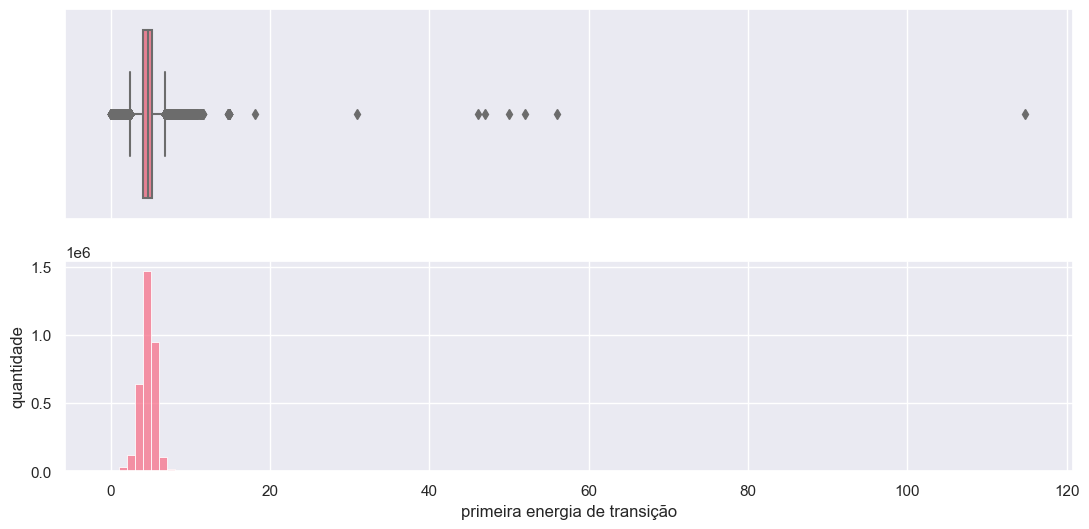

In [12]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    #   gridspec_kw={"height_ratios": (.15, .85)}
                                      )
 
# assigning a graph to each ax
sns.boxplot(x='TD_ET_00', data=data, ax=ax_box)
sns.histplot(data=data, x='TD_ET_00', binwidth=1, ax=ax_hist)
ax_hist.set(ylabel='quantidade', xlabel='primeira energia de transição')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

[Text(0.5, 0, 'first transition energy'), Text(0, 0.5, 'quantidade')]

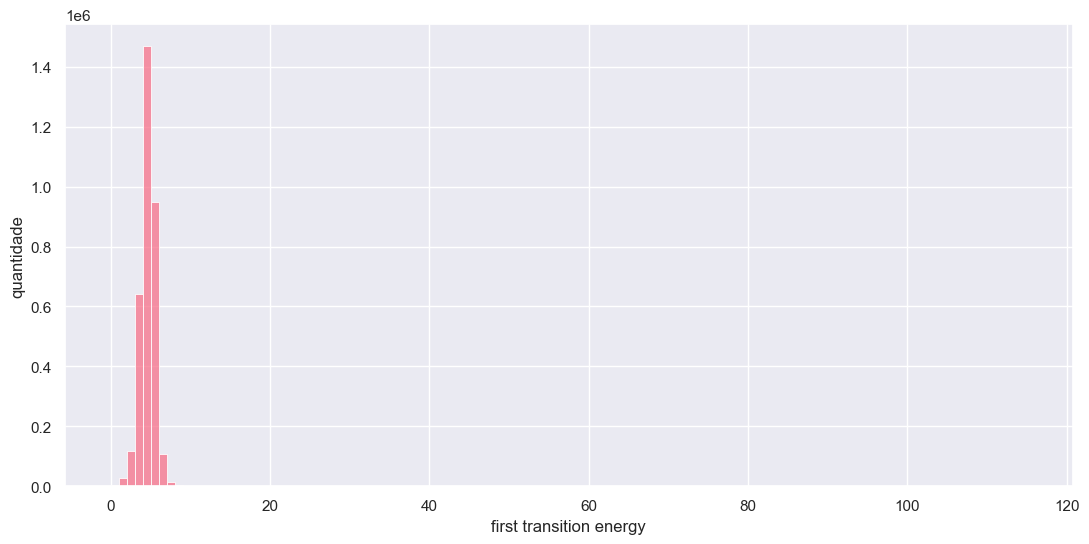

In [9]:
fst_energy = sns.histplot(data=data, x='TD_ET_00', binwidth=1)
fst_energy.set(xlabel="first transition energy", ylabel="quantidade")

<Axes: xlabel='TD_ET_00', ylabel='Count'>

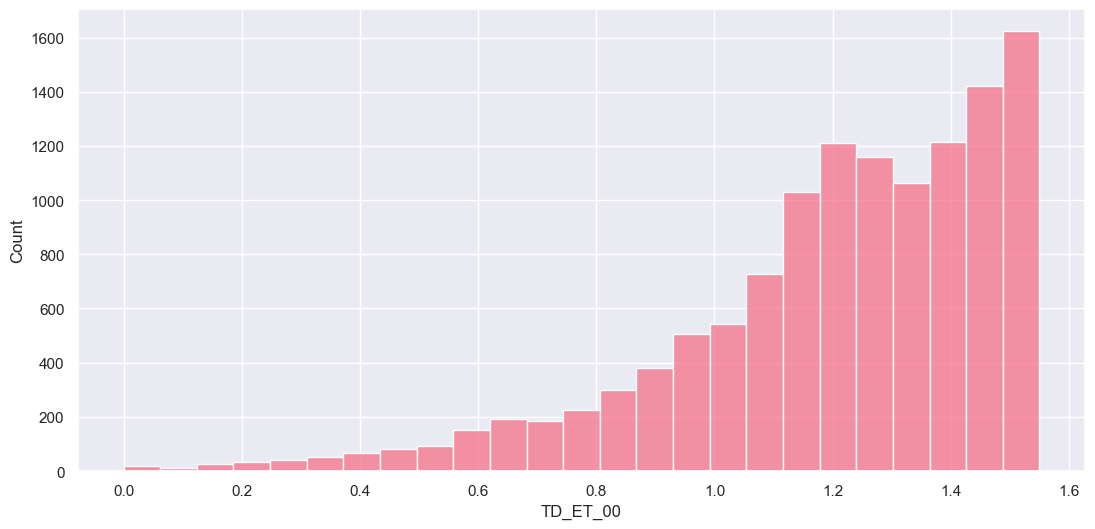

In [24]:
sns.histplot(data=data[1.55 > data['TD_ET_00']], x='TD_ET_00', bins=25)

In [18]:
data[data['TD_ET_00'] > 10]

,cid,canonical smiles,isomeric smiles,charge,total dipole moment,multiplicity,homo,lumo,gap,total energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
188,223,[NH4+],[NH4+],1,0.00,1,-22.49,-5.74,16.75,-0.19,14.87,0.14,14.87,0.14,14.87,0.14,16.90,0.00,16.90,0.00,16.90,0.00,17.06,0.00,17.06,0.00,17.27,0.11,17.27,0.11
244,297,C,C,0,0.00,1,-10.59,3.21,13.80,-0.14,10.10,0.13,10.10,0.13,10.10,0.13,11.27,0.00,11.27,0.00,11.32,0.00,11.32,0.00,11.32,0.00,11.33,0.00,11.33,0.00
621,783,[HH],[HH],0,0.00,1,-11.81,2.72,14.53,-0.00,14.75,0.62,28.49,0.00,42.29,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,888,[Mg+2],[Mg+2],2,0.00,1,-70.37,-18.24,52.12,-0.67,49.97,0.06,49.97,0.06,49.97,0.06,55.43,0.00,55.43,0.00,55.43,0.00,55.46,0.00,55.46,0.00,55.46,0.00,55.46,0.00
731,923,[Na+],[Na+],1,0.00,1,-39.52,-6.98,32.54,-0.55,30.90,0.04,30.90,0.04,30.90,0.04,34.00,0.00,34.00,0.00,34.00,0.00,34.00,0.00,34.00,0.00,34.03,0.00,34.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953735,59904965,C,[2H]C([3H])[3H],0,0.00,1,-10.59,3.21,13.80,-0.14,10.10,0.13,10.10,0.13,10.10,0.13,11.27,0.00,11.27,0.00,11.32,0.00,11.32,0.00,11.32,0.00,11.33,0.00,11.33,0.00
1955626,59925419,C,[1H]C,0,0.00,1,-10.59,3.21,13.80,-0.14,10.10,0.13,10.10,0.13,10.10,0.13,11.27,0.00,11.27,0.00,11.32,0.00,11.32,0.00,11.32,0.00,11.33,0.00,11.33,0.00
3165984,71309066,C(F)(F)(F)F,[13C](F)(F)(F)F,0,0.00,1,-11.66,4.87,16.53,-1.48,11.51,0.00,11.51,0.00,11.51,0.00,12.73,0.00,12.73,0.00,12.75,0.13,12.75,0.13,12.75,0.13,12.77,0.00,12.79,0.00
3166059,71309203,C(F)(F)(F)F,[12C](F)(F)(F)F,0,0.00,1,-11.66,4.87,16.53,-1.48,11.51,0.00,11.51,0.00,11.51,0.00,12.73,0.00,12.73,0.00,12.75,0.13,12.75,0.13,12.75,0.13,12.77,0.00,12.79,0.00


In [25]:
data[1.55 > data['TD_ET_00']].shape

(12356, 30)

<Axes: xlabel='TD_ET_00', ylabel='Count'>

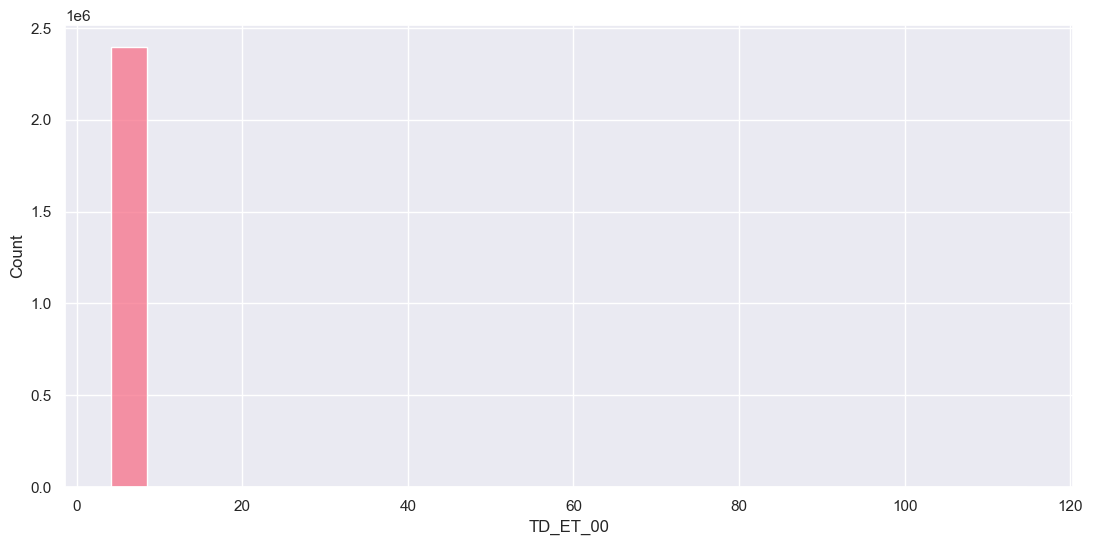

In [26]:
sns.histplot(data=data[data['TD_ET_00'] > 4.13], x='TD_ET_00', bins=25)

In [27]:
data[data['TD_ET_00'] > 4.13].shape

(2397489, 30)

<Axes: xlabel='TD_ET_00', ylabel='Count'>

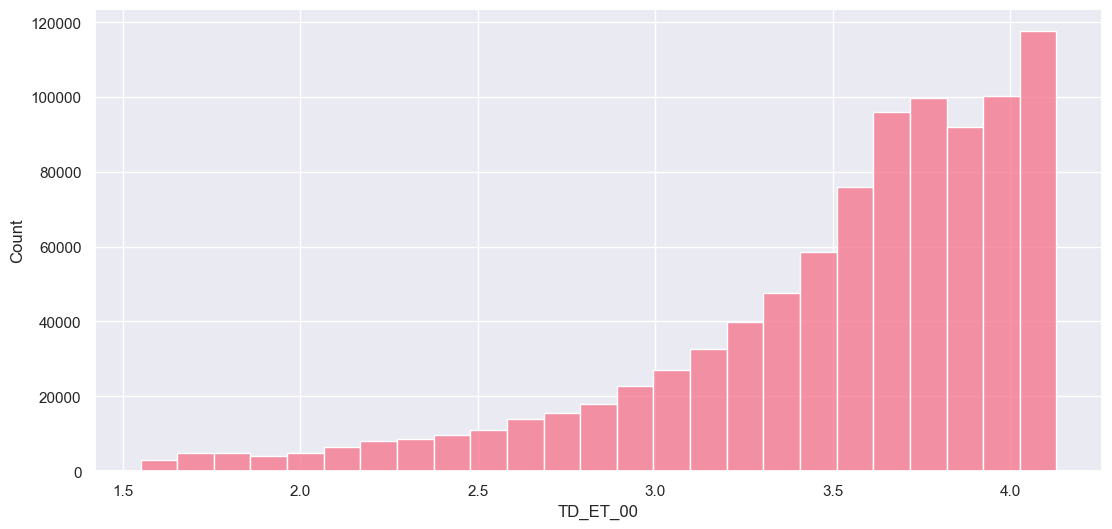

In [28]:
sns.histplot(data=data[(1.55 < data['TD_ET_00']) & (data['TD_ET_00'] < 4.13)], x='TD_ET_00', bins=25)

In [29]:
data[(1.55 < data['TD_ET_00']) & (data['TD_ET_00'] < 4.13)].shape

(922628, 30)

In [30]:
data[(1.7712027571428572 < data['TD_ET_00']) & (data['TD_ET_00'] < 3.099604825)].shape

(154257, 30)

<Axes: xlabel='TD_ET_00'>

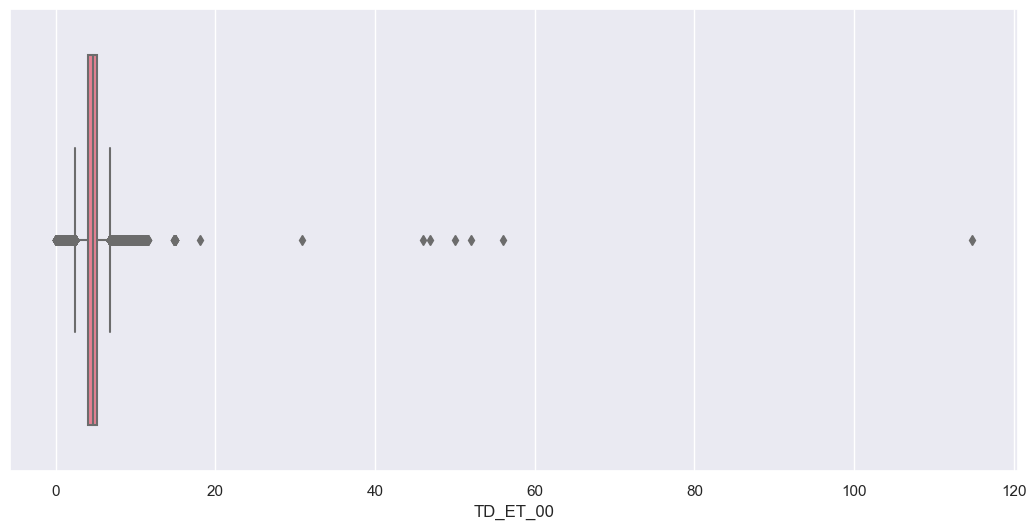

In [31]:
sns.boxplot(x='TD_ET_00', data=data)

<Axes: xlabel='gap'>

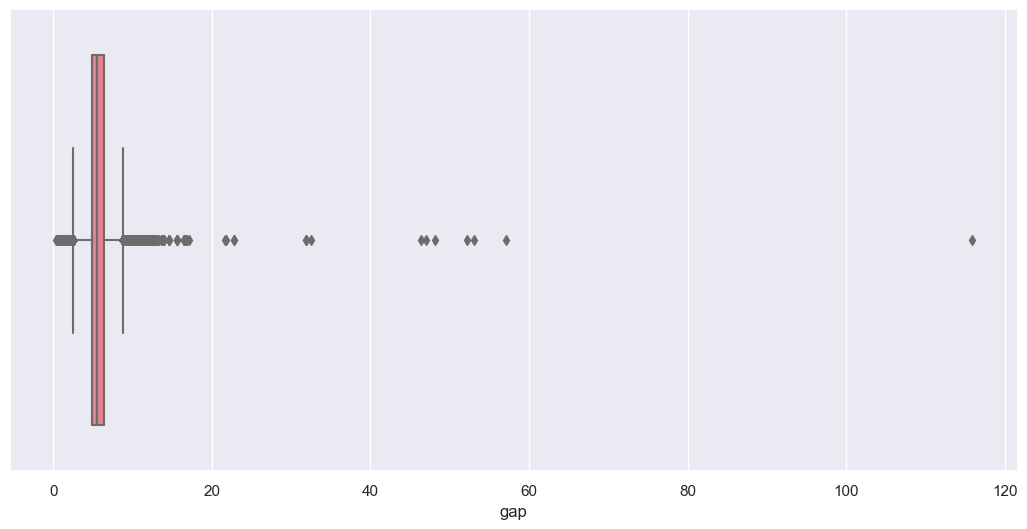

In [32]:
sns.boxplot(x='gap', data=data)

<Axes: xlabel='TD_ET_00', ylabel='gap'>

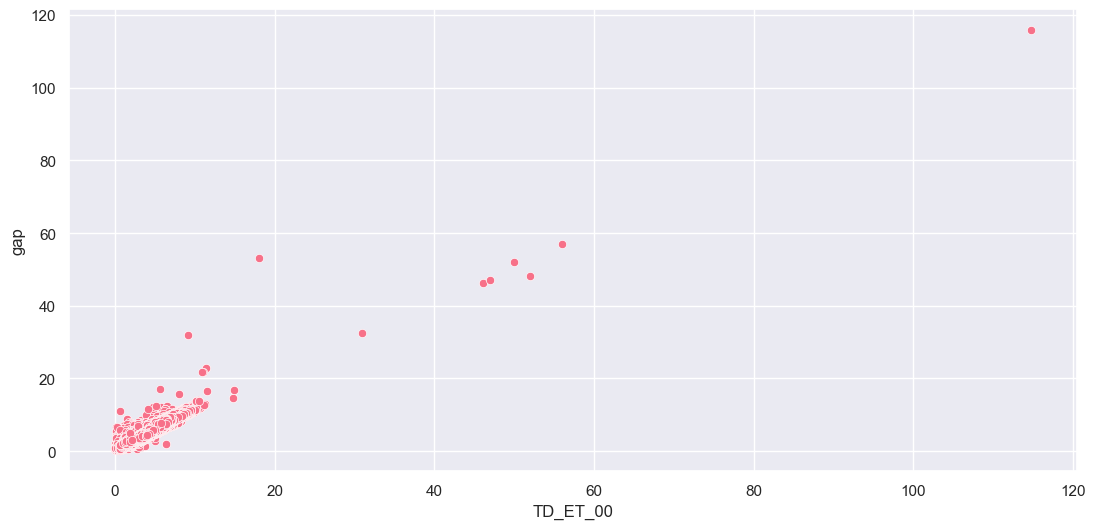

In [33]:
sns.scatterplot(x=data['TD_ET_00'], y=data['gap'])

<Axes: xlabel='TD_ET_00', ylabel='gap'>

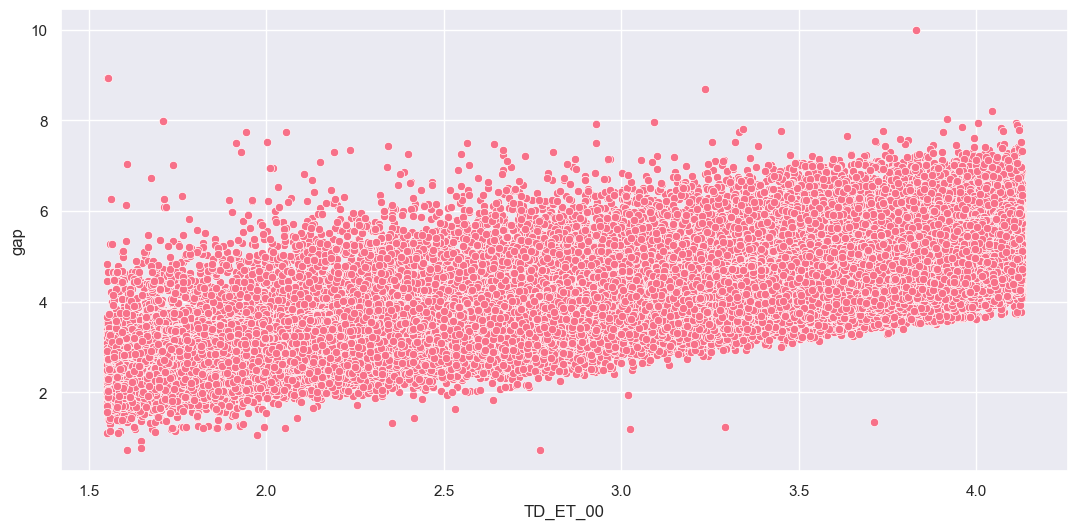

In [34]:
sns.scatterplot(data=data[(1.55 < data['TD_ET_00']) & (data['TD_ET_00'] < 4.13)], x='TD_ET_00', y='gap')

<Axes: xlabel='TD_ET_00', ylabel='gap'>

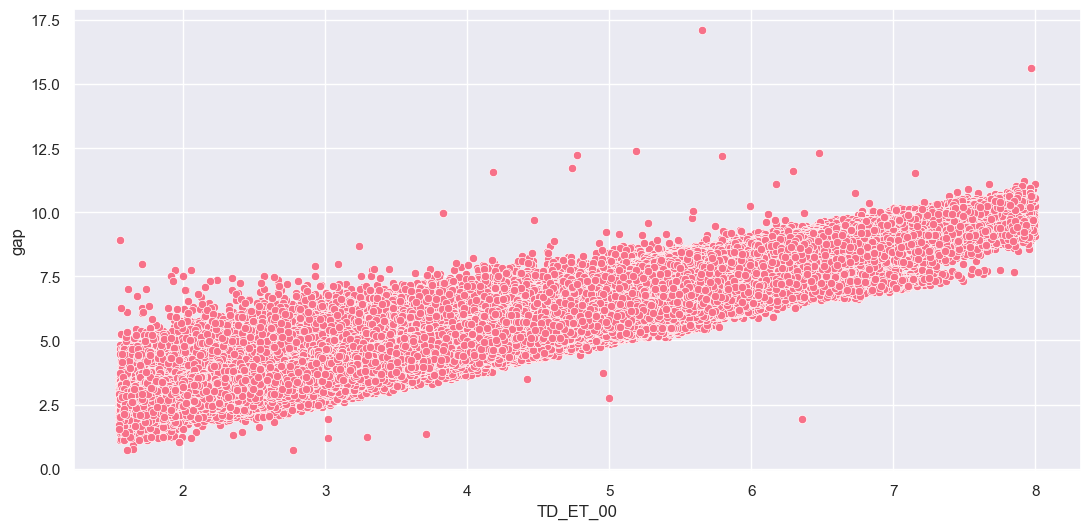

In [35]:
sns.scatterplot(data=data[(1.55 < data['TD_ET_00']) & (data['TD_ET_00'] < 8)], x='TD_ET_00', y='gap')

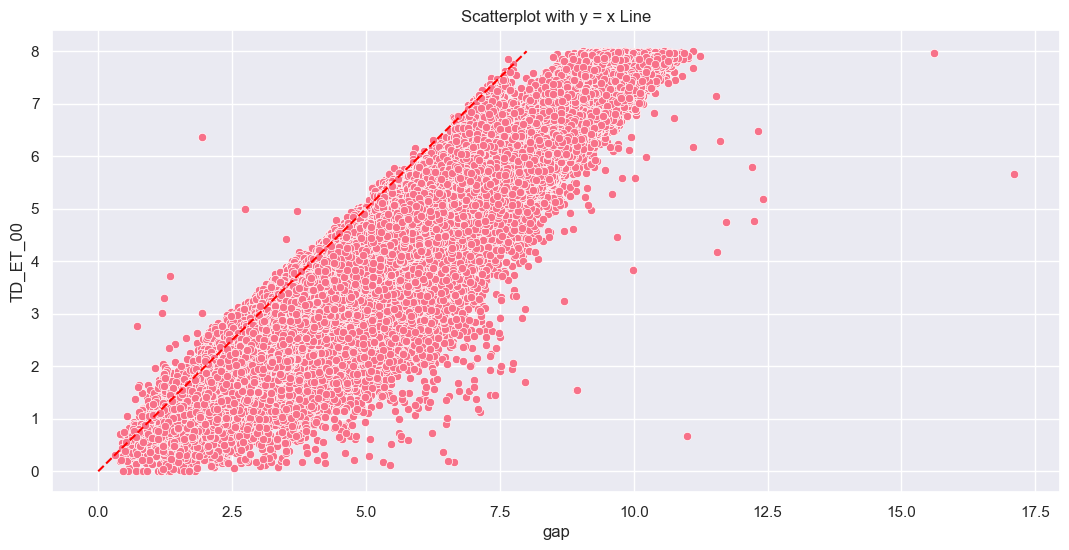

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'data'

# Create the scatterplot
sns.scatterplot(data=data[data['TD_ET_00'] < 8], x='gap', y='TD_ET_00')

# Plot the line y = x
plt.plot([0, 8], [0, 8], color='red', linestyle='--')  # Adjust the range if needed

# Add labels and title
plt.xlabel('gap')
plt.ylabel('TD_ET_00')
plt.title('Scatterplot with y = x Line')

# Show the plot
plt.show()

Slope of the regression line: 0.6579519890673404
Intercept of the regression line: 0.8324277668505982
Coefficient of determination: 0.8274067112552026


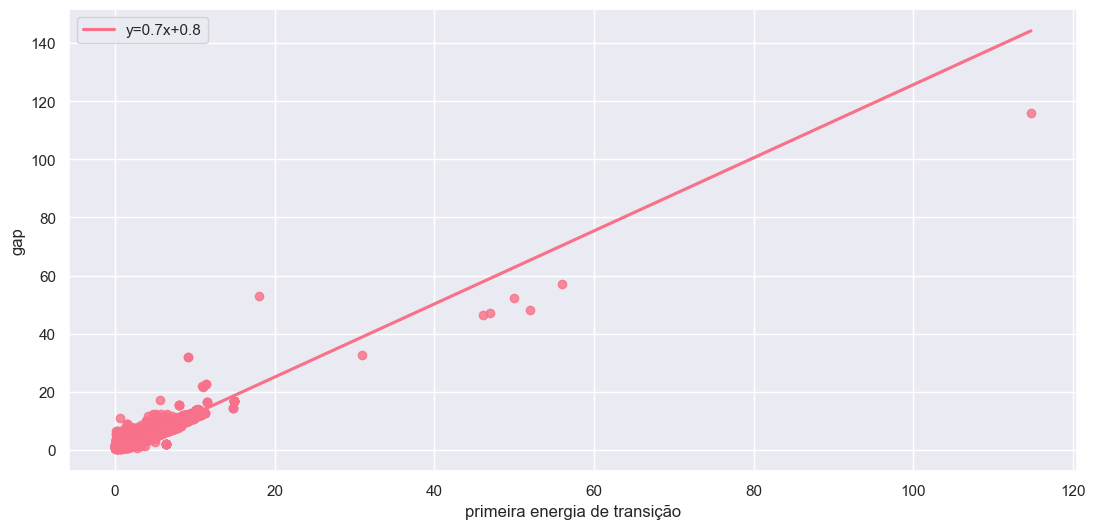

In [21]:
# obtendo regressão linear para (gap, TD_ET_00)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['gap'], data['TD_ET_00'])
ax = sns.regplot(x='TD_ET_00', y='gap', data = data, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='primeira energia de transição')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(data['gap'],data['TD_ET_00'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

<Axes: xlabel='TD_ET_00', ylabel='gap'>

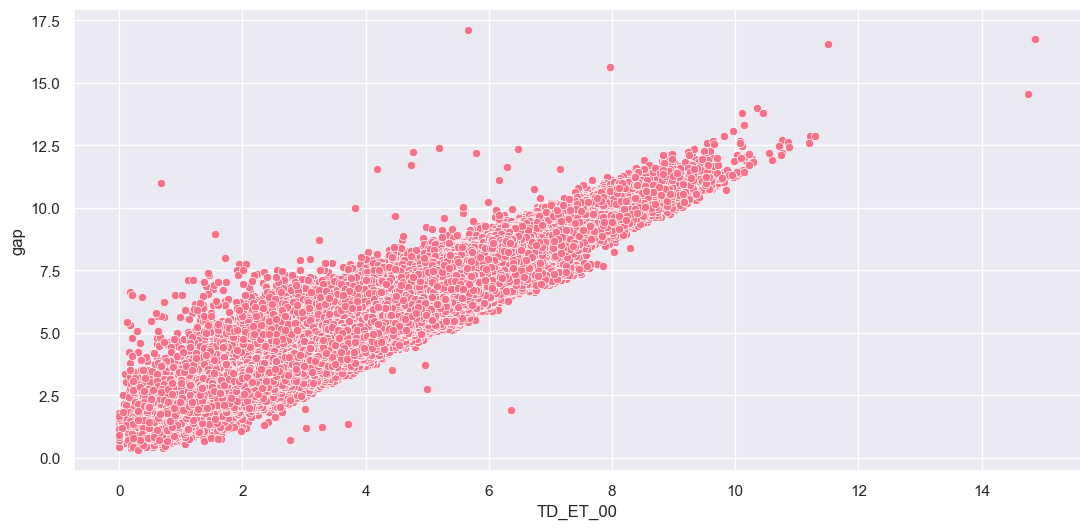

In [38]:
sns.scatterplot(data=data[data['gap'] < 20], x='TD_ET_00', y='gap')

Slope of the regression line: 0.33134395645193254
Intercept of the regression line: 1.4708637254033003
Coefficient of determination: 0.2659137052792441


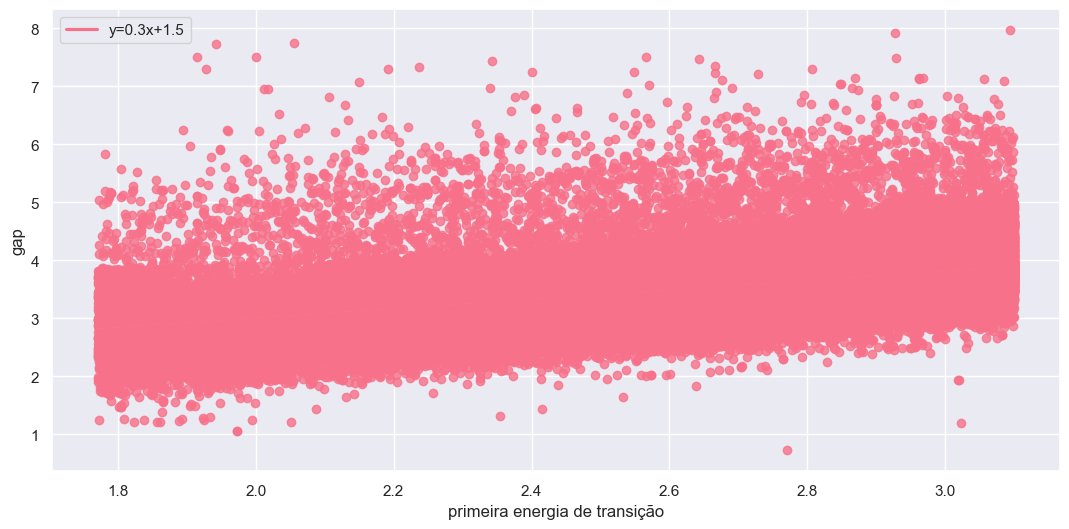

In [22]:
# obtendo regressão linear para (gap, TD_ET_00)
uvvis = data[(1.7712027571428572 < data['TD_ET_00']) & (data['TD_ET_00'] < 3.099604825)]
slope, intercept, r_value, p_value, std_err = stats.linregress(uvvis['gap'], uvvis['TD_ET_00'])
ax = sns.regplot(x='TD_ET_00', y='gap', data = uvvis, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='primeira energia de transição')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(uvvis['gap'],uvvis['TD_ET_00'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

<Axes: xlabel='diff_ET_00_gap', ylabel='TD_OS_00'>

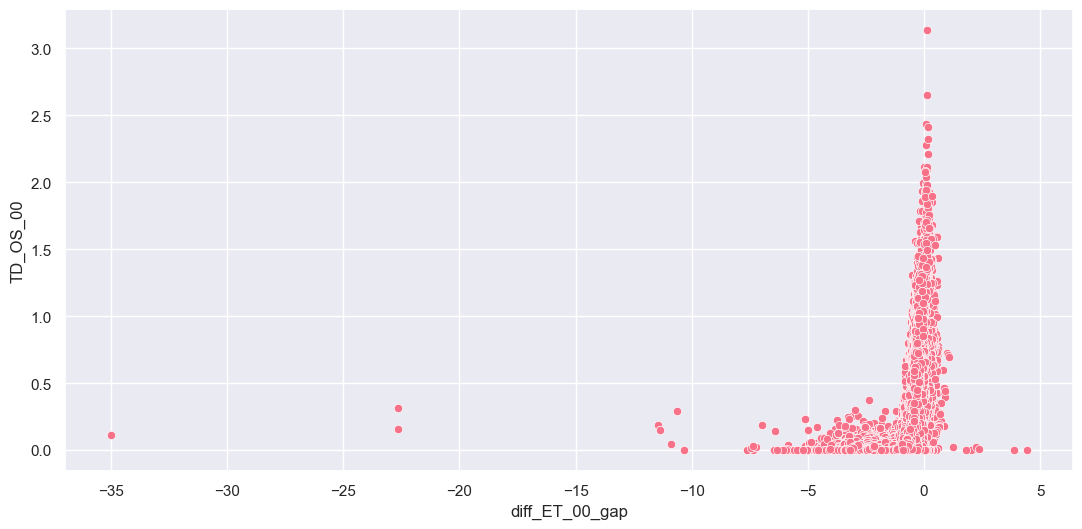

In [40]:
data['diff_ET_00_gap'] = data['TD_ET_00'] - data['gap']
sns.scatterplot(data=data, x='diff_ET_00_gap', y='TD_OS_00')

## Energia mais intensa

In [41]:
def add_max_os_energy(df):
    # Selecionar apenas as colunas que contém TD_OS e TD_ET
    td_os_cols = [col for col in df.columns if 'TD_OS' in col]
    td_et_cols = [col for col in df.columns if 'TD_ET' in col]
    td_os = df[td_os_cols].values
    td_et = df[td_et_cols].values
    
    # Encontrar o índice do maior valor em cada linha de TD_OS
    max_os_idx = np.argmax(td_os, axis=1)
    
    # Selecionar os valores correspondentes de TD_ET usando os índices encontrados acima
    td_et_os_max = np.choose(max_os_idx, td_et.T)
    
    # Adicionar a nova coluna ao dataframe
    df['TD_ET_OS_max'] = td_et_os_max
    
    return df


In [42]:
data = add_max_os_energy(data)

<Axes: xlabel='TD_ET_OS_max', ylabel='Count'>

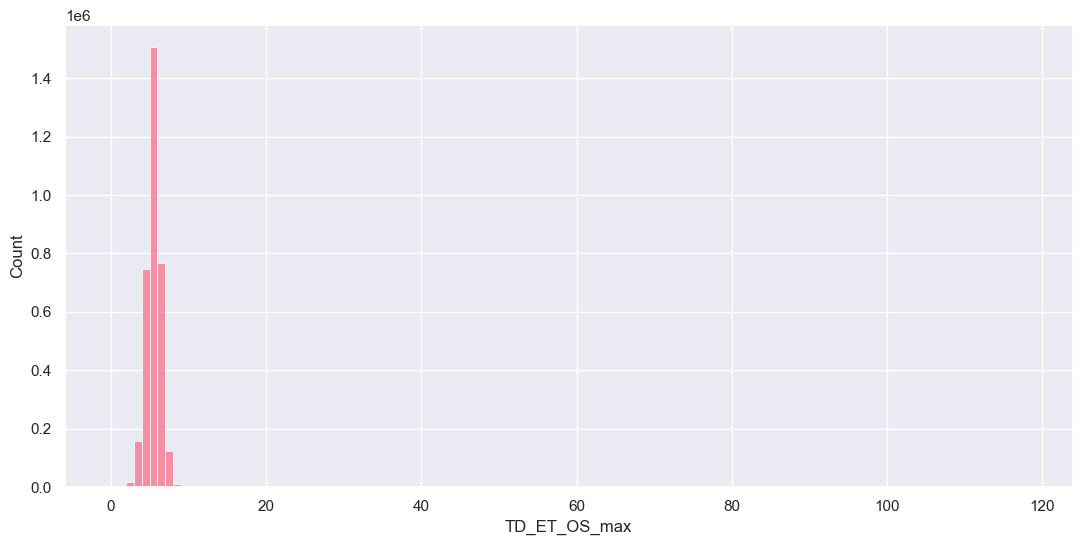

In [43]:
sns.histplot(data=data, x='TD_ET_OS_max', binwidth=1)

<Axes: xlabel='TD_ET_OS_max', ylabel='Count'>

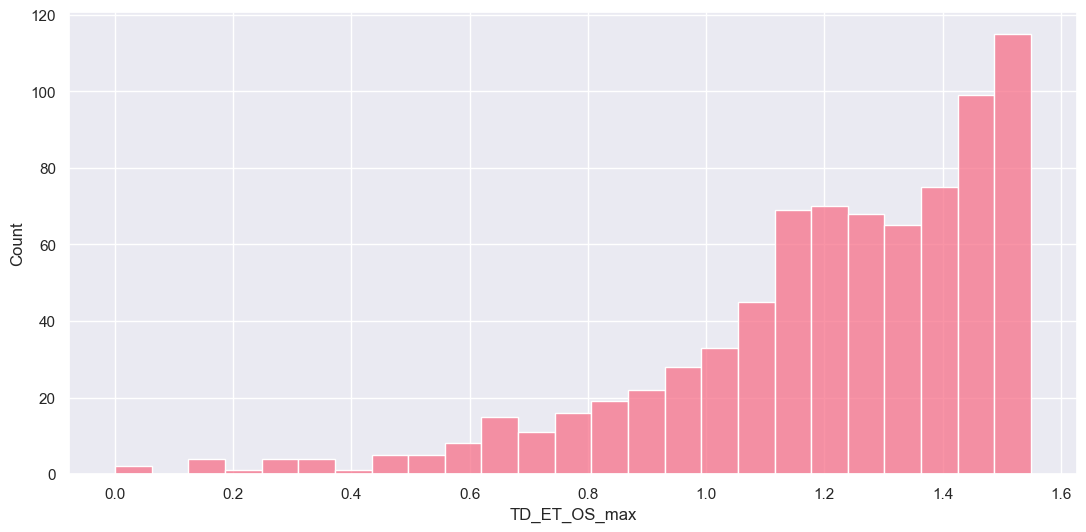

In [44]:
sns.histplot(data=data[1.55 > data['TD_ET_OS_max']], x='TD_ET_OS_max', bins=25)

In [45]:
data[1.55 > data['TD_ET_OS_max']].shape

(784, 32)

<Axes: xlabel='TD_ET_OS_max', ylabel='Count'>

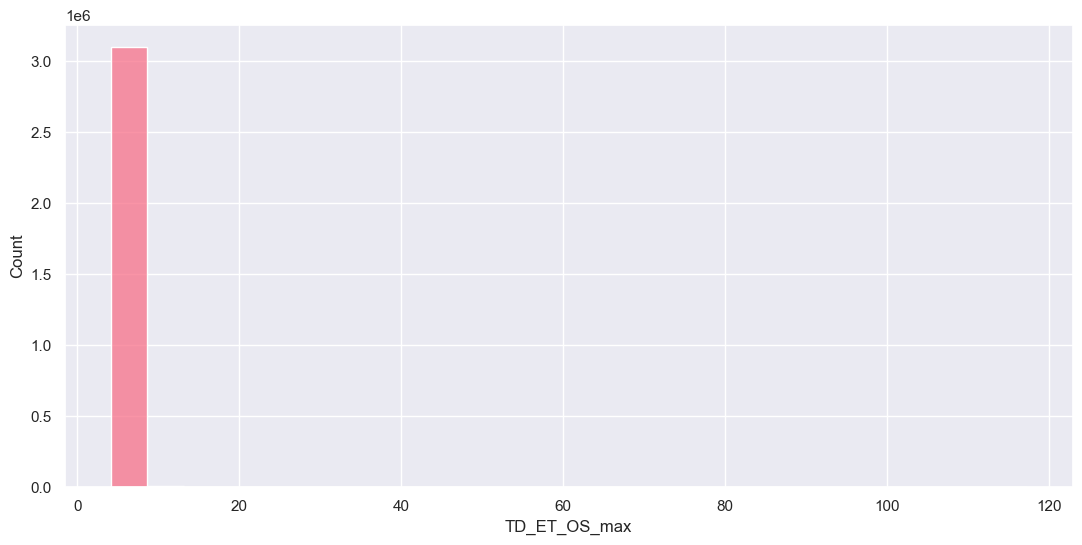

In [46]:
sns.histplot(data=data[data['TD_ET_OS_max'] > 4.13], x='TD_ET_OS_max', bins=25)

In [47]:
data[data['TD_ET_OS_max'] > 4.2].shape

(3073174, 32)

<Axes: xlabel='TD_ET_OS_max', ylabel='Count'>

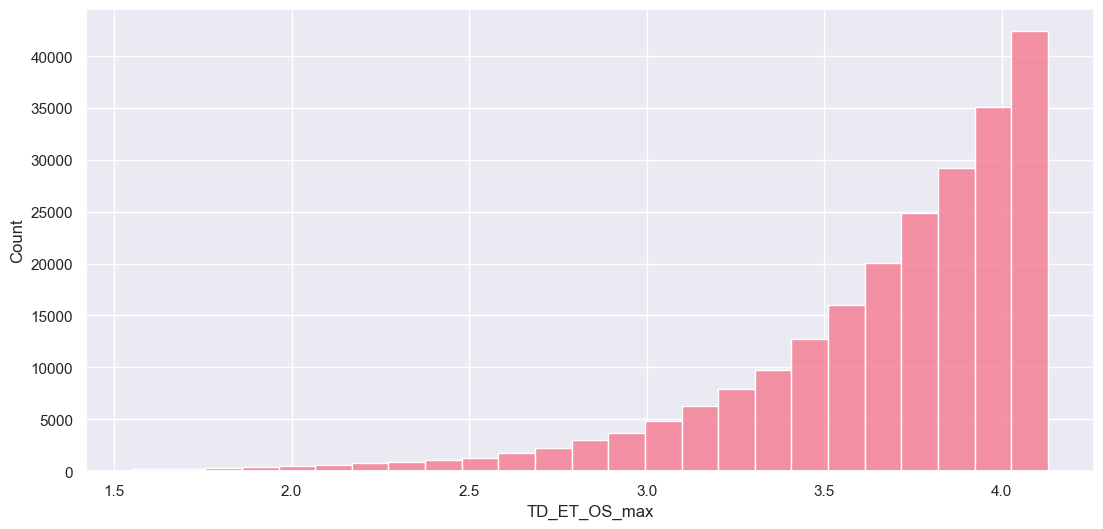

In [48]:
sns.histplot(data=data[(1.55 < data['TD_ET_OS_max']) & (data['TD_ET_OS_max'] < 4.13)], x='TD_ET_OS_max', bins=25)

<Axes: xlabel='TD_ET_OS_max', ylabel='gap'>

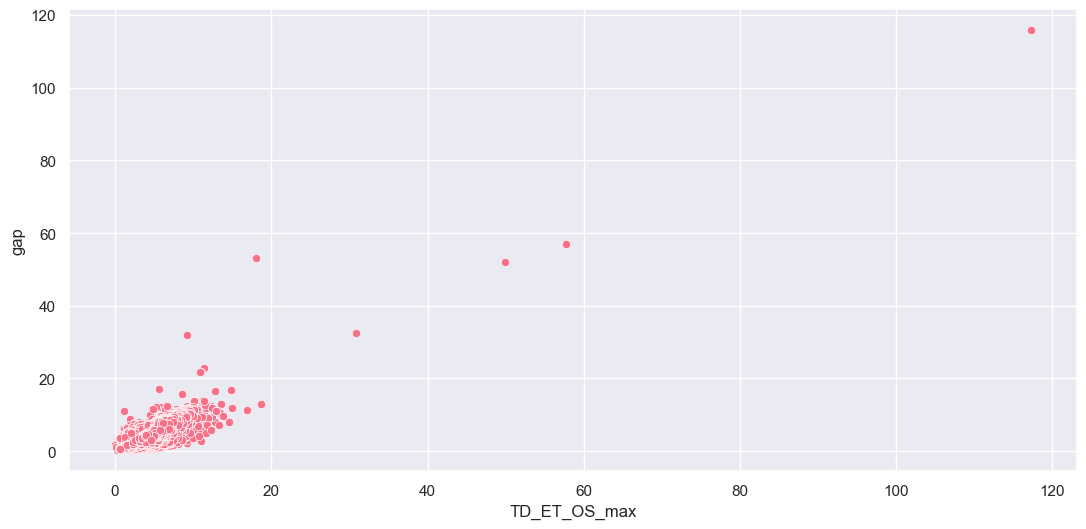

In [49]:
sns.scatterplot(x=data['TD_ET_OS_max'], y=data['gap'])

<Axes: xlabel='TD_ET_OS_max', ylabel='gap'>

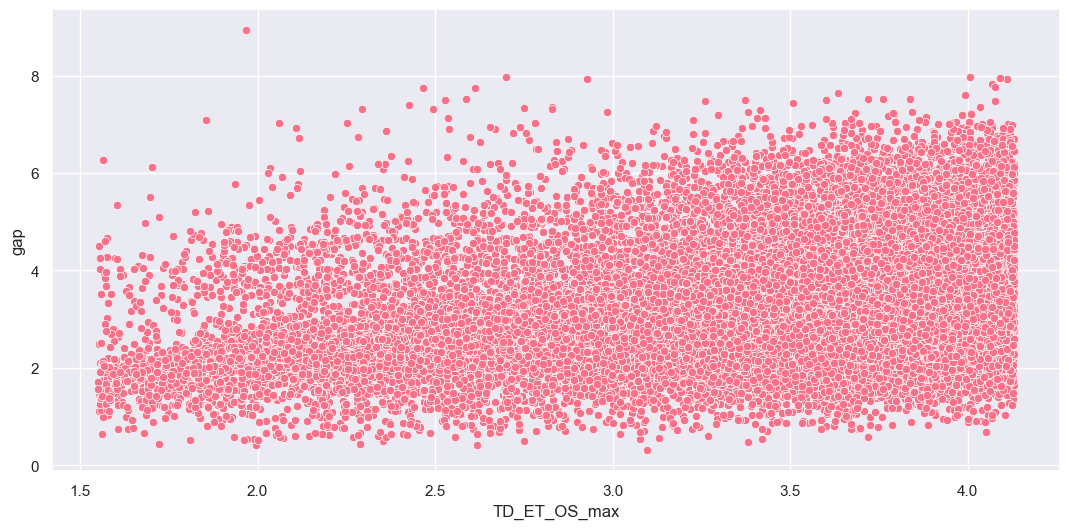

In [50]:
sns.scatterplot(data=data[(1.55 < data['TD_ET_OS_max']) & (data['TD_ET_OS_max'] < 4.13)], x='TD_ET_OS_max', y='gap')

## Distribuição atômica

In [51]:
atom_list = []
smi_error = []

for smiles in data['isomeric smiles']:
    try:
        m = Chem.MolFromSmiles(smiles)
        atoms = [ atom.GetSymbol() for atom in m.GetAtoms() ]
        atom_list.append(atoms)
    except:
        smi_error.append(smiles)

[08:21:39] WARNING: not removing hydrogen atom without neighbors
[08:21:56] Explicit valence for atom # 1 Br, 5, is greater than permitted
[08:21:57] Explicit valence for atom # 1 Si, 8, is greater than permitted
[08:22:02] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[08:22:19] WARNING: not removing hydrogen atom without neighbors
[08:25:32] WARNING: not removing hydrogen atom without neighbors
[08:25:33] WARNING: not removing hydrogen atom without neighbors
[08:25:46] Explicit valence for atom # 1 Ge, 8, is greater than permitted
[08:26:24] Explicit valence for atom # 0 Br, 2, is greater than permitted
[08:26:42] WARNING: not removing hydrogen atom without neighbors
[08:26:42] WARNING: not removing hydrogen atom without neighbors
[08:26:42] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[08:31:40] WARNING: not removing hydrogen atom without neighbors
[08:31:40] WARNING: not removing hydrogen atom without neighbors
[08:31:43] WARNING: not removing hyd

In [52]:
merged = list(itertools.chain(*atom_list))

(array([4.4407673e+07, 3.7110700e+05, 5.1378000e+05, 4.6293000e+04,
        4.8878000e+04, 5.3869400e+05, 3.2042000e+04, 4.5800000e+02,
        1.1000000e+01, 1.8000000e+01]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

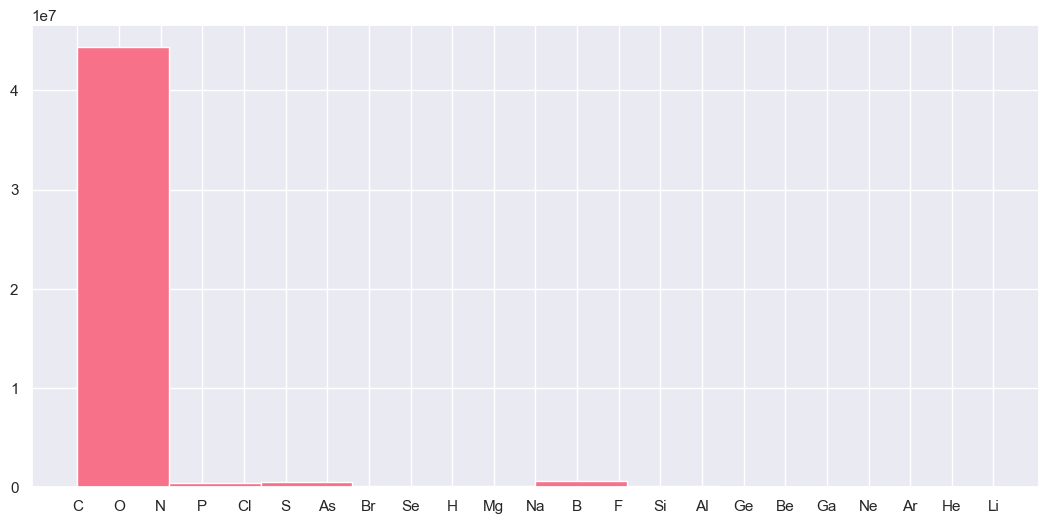

In [53]:
plt.hist(merged)

In [54]:
len(smi_error)

41

In [55]:
all_atoms = []

for item in atom_list:
    for atom in item:
        all_atoms.append(atom)

In [56]:
# átomos presentes na base
atoms_in_db = list(set(all_atoms))
atoms_in_db

['S',
 'Ar',
 'Br',
 'H',
 'C',
 'Li',
 'Mg',
 'Cl',
 'O',
 'Ga',
 'N',
 'Al',
 'Na',
 'Si',
 'Ge',
 'As',
 'B',
 'Se',
 'He',
 'F',
 'Be',
 'Ne',
 'P']

In [57]:
# átomos a serem removidos da base
atoms_to_find = ['H', 'B', 'C', 'N', 'O', 'P', 'S', 'F', 'Cl', 'Br', 'I']
atoms_to_drop = list(set([atom for atom in all_atoms if atom not in atoms_to_find]))
atoms_to_drop

['Se', 'Si', 'Ga', 'He', 'Be', 'Ar', 'Ge', 'Li', 'Al', 'Ne', 'As', 'Mg', 'Na']

In [58]:
# quantidade de moléculas com H, B, C, N, O, P, S, F, Cl, Br, I
len(data[~data['isomeric smiles'].str.contains('Ge|As|Al|Si|Ar|Mg|He|Se|Li|Ga|Be|Ne|Na', regex=True)])

3300143

In [59]:
# quantidade de moléculas com Ge, As, Al, Si, Ar, Mg, He, Se, Li, Ga, Be, Ne, Na
len(data[data['isomeric smiles'].str.contains('Ge|As|Al|Si|Ar|Mg|He|Se|Li|Ga|Be|Ne|Na', regex=True)])

32330

# DETERMINAÇÃO DE CORANTES

In [60]:
# estabelecendo o range de energia do uv-vis
min_eV = 1.5498
max_eV = 4.1328

# função para verificar se o valor está dentro do intervalo desejado
def check_range(value):
    if value >= min_eV and value <= max_eV:
        return 1
    else:
        return 0

# aplicando a função check_range à coluna TD_ET_00
data['corante_00'] = data['TD_ET_00'].apply(check_range)

# aplicando a função check_range à coluna TD_ET_OS_max
data['corante_max'] = data['TD_ET_OS_max'].apply(check_range)

In [61]:
data['corante_00'].value_counts()

0    2406214
1     926259
Name: corante_00, dtype: int64

In [62]:
data['corante_00'].value_counts(normalize=True)

0   0.72
1   0.28
Name: corante_00, dtype: float64

In [63]:
data['corante_max'].value_counts()

0    3105381
1     227092
Name: corante_max, dtype: int64

In [64]:
data['corante_max'].value_counts(normalize=True)

0   0.93
1   0.07
Name: corante_max, dtype: float64

# CALCULANDO OS DESCRITORES

## Descritores RDKit

In [65]:
def calcular_descritores(df, coluna_smiles):
    smiles_array = df[coluna_smiles].values
    num_mols = len(smiles_array)

    descritores = {
        'MW': np.zeros(num_mols),
        'NumTotalAtoms': np.zeros(num_mols),
        'NumHeavyAtoms': np.zeros(num_mols),
        'NumHeteroAtoms': np.zeros(num_mols),
        'NumOHCount': np.zeros(num_mols),
        'NumRotatableBonds': np.zeros(num_mols),
        'NumRings': np.zeros(num_mols),
        'NumSaturatedRings': np.zeros(num_mols),
        'NumAromaticRings': np.zeros(num_mols),
        'NumAromaticHeterocycles': np.zeros(num_mols),
        'NumAliphaticHeterocycles': np.zeros(num_mols),
        # 'NumSingleBonds': np.zeros(num_mols),
        # 'NumDoubleBonds': np.zeros(num_mols),
        # 'NumTripleBonds': np.zeros(num_mols),
        # 'NumFunctionalGroups': np.zeros(num_mols),
        'NumSP2Carbons': np.zeros(num_mols),
        'NumSP3Carbons': np.zeros(num_mols),
        'NumAliphaticCarbons': np.zeros(num_mols),
        'NumAliphaticRings': np.zeros(num_mols),
        'NumAromaticCarbocycles': np.zeros(num_mols),
        'NumSaturatedCarbocycles': np.zeros(num_mols),
        'NumHDonors': np.zeros(num_mols),
        'NumHAcceptors': np.zeros(num_mols)
    }

    for i, smiles in enumerate(smiles_array):
        try:
            mol = Chem.MolFromSmiles(smiles)
            descritores['MW'][i] = Descriptors.MolWt(mol)
            descritores['NumTotalAtoms'][i] = mol.GetNumAtoms()
            descritores['NumHeavyAtoms'][i] = rdMolDescriptors.CalcNumHeavyAtoms(mol)
            descritores['NumHeteroAtoms'][i] = Lipinski.NumHeteroatoms(mol)
            descritores['NumOHCount'][i] = Lipinski.NHOHCount(mol)
            descritores['NumRotatableBonds'][i] = Lipinski.NumRotatableBonds(mol)
            descritores['NumRings'][i] = Lipinski.RingCount(mol)
            descritores['NumSaturatedRings'][i] = Lipinski.NumSaturatedRings(mol)
            descritores['NumAromaticRings'][i] = Lipinski.NumAromaticRings(mol)
            descritores['NumAromaticHeterocycles'][i] = Lipinski.NumAromaticHeterocycles(mol)
            descritores['NumAliphaticHeterocycles'][i] = Lipinski.NumAliphaticHeterocycles(mol)
            # descritores['NumSingleBonds'][i] = Descriptors.NumSingleBonds(mol)
            # descritores['NumDoubleBonds'][i] = Descriptors.NumDoubleBonds(mol)
            # descritores['NumTripleBonds'][i] = Descriptors.NumTripleBonds(mol)
            # descritores['NumFunctionalGroups'][i] = Descriptors.NumFunctionalGroups(mol)
            descritores['NumSP2Carbons'][i] = sum((x.GetHybridization() == Chem.HybridizationType.SP2) for x in mol.GetAtoms())
            descritores['NumSP3Carbons'][i] = sum((x.GetHybridization() == Chem.HybridizationType.SP3) for x in mol.GetAtoms())
            descritores['NumAliphaticCarbons'][i] = Lipinski.NumAliphaticCarbocycles(mol)
            descritores['NumAliphaticRings'][i] = Lipinski.NumAliphaticRings(mol)
            descritores['NumAromaticCarbocycles'][i] = Lipinski.NumAromaticCarbocycles(mol)
            descritores['NumSaturatedCarbocycles'][i] = Lipinski.NumSaturatedCarbocycles(mol)
            descritores['NumHDonors'][i] = Lipinski.NumHDonors(mol)
            descritores['NumHAcceptors'][i] = Lipinski.NumHAcceptors(mol)
        except:
            descritores['MW'][i] = np.nan
            descritores['NumTotalAtoms'][i] = np.nan
            descritores['NumHeavyAtoms'][i] = np.nan
            descritores['NumHeteroAtoms'][i] = np.nan
            descritores['NumOHCount'][i] = np.nan
            descritores['NumRotatableBonds'][i] = np.nan
            descritores['NumRings'][i] = np.nan
            descritores['NumSaturatedRings'][i] = np.nan
            descritores['NumAromaticRings'][i] = np.nan
            descritores['NumAromaticHeterocycles'][i] = np.nan
            descritores['NumAliphaticHeterocycles'][i] = np.nan
            # descritores['NumSingleBonds'][i] = np.nan
            # descritores['NumDoubleBonds'][i] = np.nan
            # descritores['NumTripleBonds'][i] = np.nan
            # descritores['NumFunctionalGroups'][i] = np.nan
            descritores['NumSP2Carbons'][i] = np.nan
            descritores['NumSP3Carbons'][i] = np.nan
            descritores['NumAliphaticCarbons'][i] = np.nan
            descritores['NumAliphaticRings'][i] = np.nan
            descritores['NumAromaticCarbocycles'][i] = np.nan
            descritores['NumSaturatedCarbocycles'][i] = np.nan
            descritores['NumHDonors'][i] = np.nan
            descritores['NumHAcceptors'][i] = np.nan

    df_descritores = pd.DataFrame(descritores)
    df_final = pd.concat([df[['cid', 'isomeric smiles']], df_descritores], axis=1)
    return df_final

In [66]:
# Calcular os descritores e obter o novo DataFrame
rdkit_descriptors = calcular_descritores(data, 'isomeric smiles')

[09:16:49] WARNING: not removing hydrogen atom without neighbors
[09:16:59] Explicit valence for atom # 1 Br, 5, is greater than permitted
[09:16:59] Explicit valence for atom # 1 Si, 8, is greater than permitted
[09:17:03] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[09:17:13] WARNING: not removing hydrogen atom without neighbors
[09:19:29] WARNING: not removing hydrogen atom without neighbors
[09:19:30] WARNING: not removing hydrogen atom without neighbors
[09:19:41] Explicit valence for atom # 1 Ge, 8, is greater than permitted
[09:20:18] Explicit valence for atom # 0 Br, 2, is greater than permitted
[09:20:45] WARNING: not removing hydrogen atom without neighbors
[09:20:45] WARNING: not removing hydrogen atom without neighbors
[09:20:45] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[09:26:06] WARNING: not removing hydrogen atom without neighbors
[09:26:06] WARNING: not removing hydrogen atom without neighbors
[09:26:09] WARNING: not removing hyd

In [67]:
rdkit_descriptors.isnull().sum()

cid                          0
isomeric smiles              0
MW                          41
NumTotalAtoms               41
NumHeavyAtoms               41
NumHeteroAtoms              41
NumOHCount                  41
NumRotatableBonds           41
NumRings                    41
NumSaturatedRings           41
NumAromaticRings            41
NumAromaticHeterocycles     41
NumAliphaticHeterocycles    41
NumSP2Carbons               41
NumSP3Carbons               41
NumAliphaticCarbons         41
NumAliphaticRings           41
NumAromaticCarbocycles      41
NumSaturatedCarbocycles     41
NumHDonors                  41
NumHAcceptors               41
dtype: int64

In [68]:
rdkit_descriptors.to_parquet('rdkit_descriptors.parquet', index=False)

## Descritor da Kulik

In [69]:
from ipynb.fs.full.Atomic_Descriptors_v3 import create_property_descriptors

{'H': [1, 'Hydrogen', 1.007, 2.2, 1359844.0, 25.0, 120.0, 38, 1.0], 'He': [2, 'Helium', 4.002602, nan, 2458741.0, 31.0, 140.0, 32, 2.0], 'Li': [3, 'Lithium', 6.941, 0.98, 539172.0, 145.0, 182.0, 134, 1.0], 'Be': [4, 'Beryllium', 9.012182, 1.57, 9.3227, 105.0, nan, 90, 2.0], 'B': [5, 'Boron', 10.811, 2.04, 829803.0, 85.0, nan, 82, 3.0], 'C': [6, 'Carbon', 12.0107, 2.55, 11.2603, 70.0, 170.0, 77, 4.0], 'N': [7, 'Nitrogen', 14.0067, 3.04, 1453414.0, 65.0, 155.0, 75, 5.0], 'O': [8, 'Oxygen', 15.9994, 3.44, 1361806.0, 60.0, 152.0, 73, 6.0], 'F': [9, 'Fluorine', 18.9984032, 3.98, 1742282.0, 50.0, 147.0, 71, 7.0], 'Ne': [10, 'Neon', 20.1797, nan, 215646.0, 38.0, 154.0, 69, 8.0], 'Na': [11, 'Sodium', 22.98976928, 0.93, 513908.0, 180.0, 227.0, 154, 1.0], 'Mg': [12, 'Magnesium', 24.305, 1.31, 764624.0, 150.0, 173.0, 130, 2.0], 'Al': [13, 'Aluminium', 26.9815386, 1.61, 598577.0, 125.0, nan, 118, 3.0], 'Si': [14, 'Silicon', 28.0855, 1.9, 815169.0, 110.0, 210.0, 111, 4.0], 'P': [15, 'Phosphorus', 3

In [70]:
# importando as propriedades atômicas
elem_data = pd.read_csv('Atomic properties DB.csv')
properties_dict = elem_data.set_index('Symbol').T.to_dict('list')

In [71]:
RACs_result = []

for smile, cid in zip(data['isomeric smiles'], data['cid']):
    try:
        mass = create_property_descriptors(smile, 3, properties_dict, 2)
        EN = create_property_descriptors(smile, 3, properties_dict, 3)
        In = create_property_descriptors(smile, 3, properties_dict, 4)
        aRadius = create_property_descriptors(smile, 3, properties_dict, 5)
        VdW = create_property_descriptors(smile, 3, properties_dict, 6)
        covRadius = create_property_descriptors(smile, 3, properties_dict, 7)
        valence = create_property_descriptors(smile, 3, properties_dict, 8)
        
        dict_RACs = {
            'cid': cid,
            'mass dZero': mass[0],
            'mass dOne': mass[1],
            'mass dTwo': mass[2],
            'mass dThree': mass[3],
            'EN dZero': EN[0],
            'EN dOne': EN[1],
            'EN dTwo': EN[2],
            'EN dThree': EN[3],
            'In dZero': In[0],
            'In dOne': In[1],
            'In dTwo': In[2],
            'In dThree': In[3],
            'aRadius dZero': aRadius[0],
            'aRadius dOne': aRadius[1],
            'aRadius dTwo': aRadius[2],
            'aRadius dThree': aRadius[3],
            'VdW dZero': VdW[0],
            'VdW dOne': VdW[1],
            'VdW dTwo': VdW[2],
            'VdW dThree': VdW[3],
            'covRadius dZero': covRadius[0],
            'covRadius dOne': covRadius[1],
            'covRadius dTwo': covRadius[2],
            'covRadius dThree': covRadius[3],
            'valence dZero': valence[0],
            'valence dOne': valence[1],
            'valence dTwo': valence[2],
            'valence dThree': valence[3]         
        }
    
        RACs_result.append(dict_RACs)
    
    except:
        
        dict_RACs = {
            'cid': cid,
            'mass dZero': np.nan,
            'mass dOne': np.nan,
            'mass dTwo': np.nan,
            'mass dThree': np.nan,
            'EN dZero': np.nan,
            'EN dOne': np.nan,
            'EN dTwo': np.nan,
            'EN dThree': np.nan,
            'In dZero': np.nan,
            'In dOne': np.nan,
            'In dTwo': np.nan,
            'In dThree': np.nan,
            'aRadius dZero': np.nan,
            'aRadius dOne': np.nan,
            'aRadius dTwo': np.nan,
            'aRadius dThree': np.nan,
            'VdW dZero': np.nan,
            'VdW dOne': np.nan,
            'VdW dTwo': np.nan,
            'VdW dThree': np.nan,
            'covRadius dZero': np.nan,
            'covRadius dOne': np.nan,
            'covRadius dTwo': np.nan,
            'covRadius dThree': np.nan,
            'valence dZero': np.nan,
            'valence dOne': np.nan,
            'valence dTwo': np.nan,
            'valence dThree': np.nan
        }
        
        RACs_result.append(dict_RACs)
        
    
RACs = pd.DataFrame(RACs_result)

[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:06:04] Explicit valence for atom # 1 Br, 5, is greater than permitted
[10:06:11] Explicit valence for atom # 1 Si, 8, is greater than permitted
[10:06:52] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[10:08:59] WARNING: not removing hydrogen atom without neighbors
[10:08:59] WARNING: not removing hydrogen atom without neighbors
[10:08:59] WARNING: not removing hydrogen atom without neighbors
[10:08:59] WARNING: not removing hydrogen atom without neighbors
[10:08:59] WARNING: not removing hydrogen atom without neighbor

In [72]:
RACs

,cid,mass dZero,mass dOne,mass dTwo,mass dThree,EN dZero,EN dOne,EN dTwo,EN dThree,In dZero,...,VdW dTwo,VdW dThree,covRadius dZero,covRadius dOne,covRadius dTwo,covRadius dThree,valence dZero,valence dOne,valence dTwo,valence dThree
0,1,2535.66,2416.38,3450.00,2886.20,197.38,196.25,353.18,449.60,40966461556793.15,...,1136538.00,1482730.00,104850.00,124663.00,190046.00,236813.00,330.00,332.00,499.00,507.00
1,2,2536.68,2432.49,3462.09,2914.41,202.22,203.81,358.79,462.78,42815637261129.15,...,1156938.00,1521370.00,106294.00,127437.00,192972.00,242513.00,331.00,338.00,503.00,517.00
2,3,2041.83,1887.26,2752.48,2982.88,131.57,131.36,204.55,277.97,22211467962119.56,...,711024.00,906324.00,74371.00,86939.00,130073.00,155065.00,264.00,246.00,372.00,430.00
3,4,894.07,765.80,867.16,605.98,84.14,84.13,133.04,161.63,20609509176436.38,...,438370.00,487310.00,41737.00,49284.00,67900.00,68744.00,118.00,116.00,145.00,131.00
4,5,2876.35,2932.13,2995.31,2089.10,131.43,119.39,203.49,209.05,27278102470205.38,...,584474.00,612574.00,72845.00,82779.00,109895.00,106353.00,286.00,258.00,403.00,300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332468,75276555,3125.43,2649.78,3588.28,3497.72,169.90,182.11,284.78,324.37,35411406955430.14,...,990375.00,1102850.00,106481.00,125465.00,176307.00,190116.00,294.00,325.00,440.00,451.00
3332469,75277118,3598.62,2878.83,3937.21,4302.34,183.35,190.15,299.59,366.98,31536984571080.32,...,1099450.00,1302050.00,118048.00,136752.00,195034.00,224996.00,332.00,344.00,478.00,526.00
3332470,75277120,2489.01,2633.55,3413.42,3506.62,194.38,205.42,327.83,394.63,35402914812519.12,...,1202150.00,1421300.00,118508.00,143836.00,204756.00,236634.00,302.00,344.00,469.00,511.00
3332471,75277121,2856.71,2969.44,3851.37,4122.63,211.55,221.00,358.41,383.17,39111945975664.32,...,1211500.00,1342970.00,123237.00,148533.00,208620.00,235213.00,358.00,392.00,530.00,582.00


In [73]:
RACs.isnull().sum()

cid                     0
mass dZero             41
mass dOne              41
mass dTwo              41
mass dThree            41
EN dZero               49
EN dOne                41
EN dTwo                41
EN dThree              41
In dZero               41
In dOne                41
In dTwo                41
In dThree              41
aRadius dZero          41
aRadius dOne           41
aRadius dTwo           41
aRadius dThree         41
VdW dZero           18461
VdW dOne            18458
VdW dTwo            18423
VdW dThree          18231
covRadius dZero        41
covRadius dOne         41
covRadius dTwo         41
covRadius dThree       41
valence dZero          41
valence dOne           41
valence dTwo           41
valence dThree         41
dtype: int64

In [74]:
RACs.to_parquet('descriptors_kulik.parquet', index=False)

In [75]:
# data_w_descriptors = rdkit_descriptors.merge(RACs, how='inner', on='cid')

# SALVANDO OS DADOS

In [76]:
# data_w_descriptors.to_parquet('data_w_descriptors.parquet', index=False)